<a href="https://colab.research.google.com/github/gogzicole/Hamoye-Data-science/blob/master/Data_Aggregation_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame 

In [9]:
pip install simplejson

In [10]:
!ls -lh ./data/yelp.json.gz

ls: cannot access './data/yelp.json.gz': No such file or directory


In [ ]:
import gzip
import simplejson as json

with gzip.open('yelp.json.gz', 'r') as f:
    yelp_data = [json.loads(line) for line in f]
    
yelp_df = pd.DataFrame(yelp_data)


In [14]:
yelp_df.head(3)   

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,vcNAWiLM4dR7D2nwwJ7nCA,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",True,"[Doctors, Health & Medical]",Phoenix,7,"Eric Goldberg, MD",[],-111.983758,AZ,3.5,33.499313,{'By Appointment Only': True},business
1,JwUE5GmEO-sH1FuwJgKBlQ,"6162 US Highway 51\nDe Forest, WI 53532",{},True,[Restaurants],De Forest,26,Pine Cone Restaurant,[],-89.335844,WI,4.0,43.238893,"{'Take-out': True, 'Good For': {'dessert': Fal...",business
2,uGykseHzyS5xAMWoN6YUqA,"505 W North St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '06:00'}...",True,"[American (Traditional), Restaurants]",De Forest,16,Deforest Family Restaurant,[],-89.353437,WI,4.0,43.252267,"{'Take-out': True, 'Good For': {'dessert': Fal...",business


**Filtering the DataFrame**

In [30]:
yelp_df[yelp_df['state']== 'WI'].count() # selects the dataframe with states  WI only

business_id      1903
full_address     1903
hours            1903
open             1903
categories       1903
city             1903
review_count     1903
name             1903
neighborhoods    1903
longitude        1903
state            1903
stars            1903
latitude         1903
attributes       1903
type             1903
dtype: int64

In [60]:
def get_categories(categories):
      return 'Restaurants' in categories
get_categories(yelp_df.categories)
yelp_df.head(3)

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,vcNAWiLM4dR7D2nwwJ7nCA,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",True,"[Doctors, Health & Medical]",Phoenix,7,"Eric Goldberg, MD",[],-111.983758,AZ,3.5,33.499313,{'By Appointment Only': True},business
1,JwUE5GmEO-sH1FuwJgKBlQ,"6162 US Highway 51\nDe Forest, WI 53532",{},True,[Restaurants],De Forest,26,Pine Cone Restaurant,[],-89.335844,WI,4.0,43.238893,"{'Take-out': True, 'Good For': {'dessert': Fal...",business
2,uGykseHzyS5xAMWoN6YUqA,"505 W North St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '06:00'}...",True,"[American (Traditional), Restaurants]",De Forest,16,Deforest Family Restaurant,[],-89.353437,WI,4.0,43.252267,"{'Take-out': True, 'Good For': {'dessert': Fal...",business


In [61]:
restaurants_df = yelp_df[yelp_df['categories'].apply(lambda categories: 'Restaurants' in categories)]
restaurants_df.head(3)

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
1,JwUE5GmEO-sH1FuwJgKBlQ,"6162 US Highway 51\nDe Forest, WI 53532",{},True,[Restaurants],De Forest,26,Pine Cone Restaurant,[],-89.335844,WI,4.0,43.238893,"{'Take-out': True, 'Good For': {'dessert': Fal...",business
2,uGykseHzyS5xAMWoN6YUqA,"505 W North St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '06:00'}...",True,"[American (Traditional), Restaurants]",De Forest,16,Deforest Family Restaurant,[],-89.353437,WI,4.0,43.252267,"{'Take-out': True, 'Good For': {'dessert': Fal...",business
3,LRKJF43s9-3jG9Lgx4zODg,"4910 County Rd V\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '10:30'}...",True,"[Food, Ice Cream & Frozen Yogurt, Fast Food, R...",De Forest,7,Culver's,[],-89.374983,WI,4.5,43.251045,"{'Take-out': True, 'Wi-Fi': 'free', 'Takes Res...",business


In [57]:
def get_delivery(attributes): # use this function to get businesses that delivers or
     return attributes.get('Delivery')

In [ ]:
delivers = restaurants_df['attributes'].apply(lambda attributes: attributes.get('Delivery')).fillna(False)
delivers  # use lambda function to perform the same task
restaurants_df['delivers']= delivers # this assigns the nwly created column delivers to the restaurant dataframe 
restaurants_df.delivers.mean()


In [82]:
yelp_df.head(3)

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,vcNAWiLM4dR7D2nwwJ7nCA,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",True,"[Doctors, Health & Medical]",Phoenix,7,"Eric Goldberg, MD",[],-111.983758,AZ,3.5,33.499313,{'By Appointment Only': True},business
1,JwUE5GmEO-sH1FuwJgKBlQ,"6162 US Highway 51\nDe Forest, WI 53532",{},True,[Restaurants],De Forest,26,Pine Cone Restaurant,[],-89.335844,WI,4.0,43.238893,"{'Take-out': True, 'Good For': {'dessert': Fal...",business
2,uGykseHzyS5xAMWoN6YUqA,"505 W North St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '06:00'}...",True,"[American (Traditional), Restaurants]",De Forest,16,Deforest Family Restaurant,[],-89.353437,WI,4.0,43.252267,"{'Take-out': True, 'Good For': {'dessert': Fal...",business


In [87]:
yelp_df[(yelp_df.state == 'WI') & (yelp_df.stars> 3.6) & (yelp_df.city == 'De Forest')]
# this code selects all the city columns with 'De Forest', that the stars column is greater than 3.6 in state WI

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
1,JwUE5GmEO-sH1FuwJgKBlQ,"6162 US Highway 51\nDe Forest, WI 53532",{},True,[Restaurants],De Forest,26,Pine Cone Restaurant,[],-89.335844,WI,4.0,43.238893,"{'Take-out': True, 'Good For': {'dessert': Fal...",business
2,uGykseHzyS5xAMWoN6YUqA,"505 W North St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '06:00'}...",True,"[American (Traditional), Restaurants]",De Forest,16,Deforest Family Restaurant,[],-89.353437,WI,4.0,43.252267,"{'Take-out': True, 'Good For': {'dessert': Fal...",business
3,LRKJF43s9-3jG9Lgx4zODg,"4910 County Rd V\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '10:30'}...",True,"[Food, Ice Cream & Frozen Yogurt, Fast Food, R...",De Forest,7,Culver's,[],-89.374983,WI,4.5,43.251045,"{'Take-out': True, 'Wi-Fi': 'free', 'Takes Res...",business
4,RgDg-k9S5YD_BaxMckifkg,"631 S Main St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '11:00'}...",True,"[Chinese, Restaurants]",De Forest,3,Chang Jiang Chinese Kitchen,[],-89.343722,WI,4.0,43.240875,"{'Take-out': True, 'Has TV': False, 'Outdoor S...",business


In [98]:
yelp_df_vegas = yelp_df[yelp_df.city.str.contains('Vegas')]
yelp_df_vegas.city.unique()
#this code selects all the Las Vegas in the city column 

array(['Las Vegas', 'North Las Vegas', 'N Las Vegas', 'N. Las Vegas',
       'C Las Vegas', 'Las Vegas ', 'Las Vegas, NV 89147',
       'Las Vegas East', 'North Las Vegas ', 'N E Las Vegas',
       'N W Las Vegas', 'Lake Las Vegas', 'South Las Vegas'], dtype=object)

In [100]:
yelp_df.head(3)

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,vcNAWiLM4dR7D2nwwJ7nCA,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",True,"[Doctors, Health & Medical]",Phoenix,7,"Eric Goldberg, MD",[],-111.983758,AZ,3.5,33.499313,{'By Appointment Only': True},business
1,JwUE5GmEO-sH1FuwJgKBlQ,"6162 US Highway 51\nDe Forest, WI 53532",{},True,[Restaurants],De Forest,26,Pine Cone Restaurant,[],-89.335844,WI,4.0,43.238893,"{'Take-out': True, 'Good For': {'dessert': Fal...",business
2,uGykseHzyS5xAMWoN6YUqA,"505 W North St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '06:00'}...",True,"[American (Traditional), Restaurants]",De Forest,16,Deforest Family Restaurant,[],-89.353437,WI,4.0,43.252267,"{'Take-out': True, 'Good For': {'dessert': Fal...",business


**Group By**

In [120]:
grouped_df = yelp_df.groupby('city')['stars']
grouped_df.mean().head()


city
Ahwatukee          3.687500
Anthem             3.781818
Apache Junction    3.637500
Arcadia            5.000000
Atlanta            3.500000
Name: stars, dtype: float64

In [119]:
summary_stats = yelp_df.groupby('city').agg({'stars':['mean','std'],'review_count':'sum','business_id':'count'})
summary_stats.head()

stars           review_count business_id
                     mean       std          sum       count
city                                                        
Ahwatukee        3.687500  1.066955          258           8
Anthem           3.781818  0.756231          727          55
Apache Junction  3.637500  1.028010          853          80
Arcadia          5.000000       NaN            4           1
Atlanta          3.500000       NaN           16           1

In [123]:
yelp_df.groupby(['city','stars']).mean()


open  review_count   longitude   latitude
city      stars                                               
Ahwatukee 2.0    0.000000      7.000000 -111.975151  33.348551
          2.5    1.000000      4.000000 -111.977310  33.320339
          3.0    1.000000      5.000000 -111.991215  33.304874
          4.0    1.000000    111.000000 -111.984551  33.319849
          4.5    1.000000      8.000000 -111.992047  33.324076
...                   ...           ...         ...        ...
Youngtown 3.0    1.000000      7.000000 -112.301042  33.605731
          4.0    1.000000     11.000000 -112.298765  33.592236
          4.5    1.000000      7.000000 -112.302164  33.604810
          5.0    0.833333      5.333333 -112.300137  33.600599
chandler  5.0    1.000000      3.000000 -111.915341  33.324494

[616 rows x 4 columns]

In [127]:
def count_categories(group):
     categories = set()
     for row in group:
        categories.update(row)
     return len(categories)

yelp_df.groupby('city')['categories'].apply(count_categories)

city
Ahwatukee          21
Anthem             75
Apache Junction    87
Arcadia             5
Atlanta             2
                   ..
Wickenburg         42
Windsor            15
Woolwich            4
Youngtown          23
chandler            2
Name: categories, Length: 167, dtype: int64

**sorting DataFrames**

In [129]:
yelp_df.sort_values('stars').head(3) # sorting the dataframe by values in stars

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
36220,2Q2tZ0yQo25cni0PT2j0Zw,"6420 Spring Mountain Rd\nChinatown\nLas Vegas,...",{},True,"[Real Estate Services, Property Management, Ho...",Las Vegas,3,Total Real Eatate of Nevada,[Chinatown],-115.232316,NV,1.0,36.125870,{},business
27946,cHvL85QIV-L2-YlLOcwlCw,"5235 S Kyrene Rd\nSte 106\nTempe, AZ 85283","{'Monday': {'close': '18:00', 'open': '10:00'}...",True,"[Sporting Goods, Shopping, Golf Equipment, Out...",Tempe,3,Custom Golf Center,[],-111.945955,AZ,1.0,33.376734,{},business
36332,e23Sa3FCTaIOSZzJsT8sIQ,"3949 N Drinkwater Blvd\nScottsdale, AZ 85251",{},True,"[Professional Services, Internet Service Provi...",Scottsdale,3,Cox Cable,[],-111.921620,AZ,1.0,33.493469,{},business


In [132]:
yelp_df.set_index('business_id').sort_index().head(3)

,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
business_id,,,,,,,,,,,,,,
--1emggGHgoG6ipd_RMb-g,"3280 S Decatur Blvd\nWestside\nLas Vegas, NV 8...",{},True,"[Food, Convenience Stores]",Las Vegas,4,Sinclair,[Westside],-115.207238,NV,4.0,36.130531,"{'Parking': {'garage': False, 'street': False,...",business
--4Pe8BZ6gj57VFL5mUE8g,"21001 North Tatum Blvd. #24\nPhoenix, AZ 85050",{},True,"[Shopping, Office Equipment]",Phoenix,5,Office Max,[],-111.974607,AZ,3.0,33.678615,"{'Parking': {'garage': False, 'street': False,...",business
--5jkZ3-nUPZxUvtcbr8Uw,"1336 N Scottsdale Rd\nScottsdale, AZ 85257","{'Monday': {'close': '21:00', 'open': '11:00'}...",True,"[Greek, Restaurants]",Scottsdale,42,Mika's Greek,[],-111.926908,AZ,4.5,33.463373,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...",business


**joining Datasets**

In [138]:
census = pd.read_csv('PEP_2016_PEPANNRES.csv', skiprows=[1])

census.head(2)

,GEO.id,GEO.id2,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016
0,0610000US0900104720,900104720,"Bethel town, Fairfield County, Connecticut",18584.0,18584,18642,18942,19150,19267,19316,19463,19627
1,0610000US0900108070,900108070,"Bridgeport town, Fairfield County, Connecticut",144229.0,144236,144912,146226,146962,147666,147560,147090,145936


In [139]:
census['city'] = census['GEO.display-label'].apply(lambda x: x.split(', ')[0])
census['state'] = census['GEO.display-label'].apply(lambda x: x.split(', ')[2])

In [144]:
census.city.unique()

array(['Bethel town', 'Bridgeport town', 'Brookfield town', ...,
       'Sherry town', 'Vesper village', 'Wisconsin Rapids city'],
      dtype=object)

In [ ]:
state_abbr = dict(zip(census.state.unique(),['CT', 'IL', 'IN', 'KS', 'ME', 'MA', 'MI', 'MN', 'MO', 'NE', 'NH', 'NJ', 'NY', 'ND', 'OH', 'PA', 'RI', 'SD', 'VT', 'WI']))
state_abbr

In [148]:
census.state = census['state'].replace(state_abbr)

In [150]:
# remove last word (e.g. 'city', 'town', township', 'borough', 'village') from city names

census['city'] = census['city'].apply(lambda x: ' '.join(x.split(' ')[:-1]))

In [158]:
merged_df = yelp_df.merge(census, on = ['city', 'state'], how = 'inner')
merged_df.head(3)


,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type,GEO.id,GEO.id2,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016
0,HxPpZSY6Q1eARuiahhra6A,"6401 University Ave\nMiddleton, WI 53562",{},False,"[Event Planning & Services, Party & Event Plan...",Middleton,5,Crandalls Carryout & Catering,[],-89.491800,WI,4.0,43.093265,"{'Take-out': True, 'Caters': True, 'Attire': '...",business,0610000US5502551575,5502551575,"Middleton city, Dane County, Wisconsin",17442.0,17558,17622,17903,18271,18522,18694,18955,19109
1,HxPpZSY6Q1eARuiahhra6A,"6401 University Ave\nMiddleton, WI 53562",{},False,"[Event Planning & Services, Party & Event Plan...",Middleton,5,Crandalls Carryout & Catering,[],-89.491800,WI,4.0,43.093265,"{'Take-out': True, 'Caters': True, 'Attire': '...",business,0610000US5502551600,5502551600,"Middleton town, Dane County, Wisconsin",5877.0,5831,5845,5943,6030,6086,6140,6179,6257
2,SKLw05kEIlZcpTD5pqma8Q,"2039 Allen Blvd\nMiddleton, WI 53562","{'Monday': {'close': '14:00', 'open': '11:00'}...",True,"[Party & Event Planning, Asian Fusion, Event P...",Middleton,41,Imperial Garden Chinese Restaurant,[],-89.485169,WI,3.0,43.090642,"{'Take-out': True, 'Good For': {'dessert': Fal...",business,0610000US5502551575,5502551575,"Middleton city, Dane County, Wisconsin",17442.0,17558,17622,17903,18271,18522,18694,18955,19109


In [159]:
city_counts = yelp_df.groupby('city')['business_id'].count().rename('city_counts')
city_counts.head()

city
Ahwatukee           8
Anthem             55
Apache Junction    80
Arcadia             1
Atlanta             1
Name: city_counts, dtype: int64

In [161]:
pd.concat([yelp_df.set_index('city'), city_counts], axis=1, join='inner').reset_index().head(3)

,city,business_id,full_address,hours,open,categories,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type,city_counts
0,Phoenix,vcNAWiLM4dR7D2nwwJ7nCA,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",True,"[Doctors, Health & Medical]",7,"Eric Goldberg, MD",[],-111.983758,AZ,3.5,33.499313,{'By Appointment Only': True},business,6715
1,De Forest,JwUE5GmEO-sH1FuwJgKBlQ,"6162 US Highway 51\nDe Forest, WI 53532",{},True,[Restaurants],26,Pine Cone Restaurant,[],-89.335844,WI,4.0,43.238893,"{'Take-out': True, 'Good For': {'dessert': Fal...",business,6
2,De Forest,uGykseHzyS5xAMWoN6YUqA,"505 W North St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '06:00'}...",True,"[American (Traditional), Restaurants]",16,Deforest Family Restaurant,[],-89.353437,WI,4.0,43.252267,"{'Take-out': True, 'Good For': {'dessert': Fal...",business,6


**ploting with pandas**

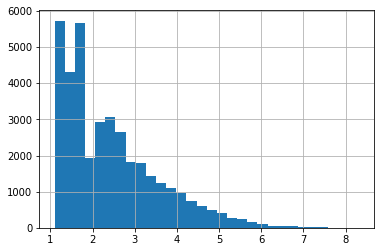

In [162]:
yelp_df['review_count'].apply(np.log).hist(bins=30)

In [164]:
pop_growth = pd.read_html('https://web.archive.org/web/20170127165708/https://www.census.gov/population/international/data/worldpop/table_population.php', attrs={'class': 'query_table'}, parse_dates=[0])[0]
pop_growth.dropna(inplace=True)
pop_growth.head()

,Year,Population,Annual Growth Rate (%),Annual Population Change
0,1950-01-01,2.557629e+09,1.459,37311223.0
1,1951-01-01,2.594940e+09,1.612,41832429.0
2,1952-01-01,2.636772e+09,1.717,45281083.0
3,1953-01-01,2.682053e+09,1.796,48174715.0
4,1954-01-01,2.730228e+09,1.900,51870839.0


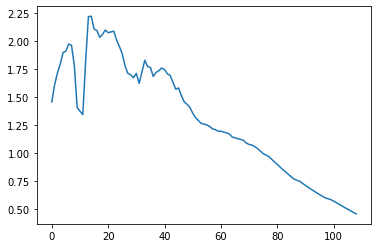

In [165]:
pop_growth['Annual Growth Rate (%)'].plot()